## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [9]:
import pandas as pd
import numpy as np
#import networkx as nx
#import plotly.express as px
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [21]:
# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)
X = mnist.data
y = mnist.target

# Split it into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=(1/7), random_state=42)

print("Train shape: ",X_train.shape)
print("Test shape: ",X_test.shape)

Train shape:  (60000, 784)
Test shape:  (10000, 784)


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [29]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest Classifier
rnd_clf = RandomForestClassifier()

#Timed training RFC model
start_time = time.time()
rnd_clf.fit(X_train,y_train)
end_time = time.time()

#Evaluate the test accuracy
y_preds = rnd_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_preds)

# Print results
print('RF Classifier Model')
print('MNIST done! Time elapsed: {} seconds ' .format(end_time-start_time))
print(f"Test accuracy: {accuracy * 100:.2f}%")

RF Classifier Model
MNIST done! Time elapsed: 52.20034074783325 seconds 
Test accuracy: 96.66%


__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [31]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Implement PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) #only use transform()... NOT fit_transform()

# Random Forest Classifier
rnd_clf_pca = RandomForestClassifier(random_state=42)

#timed training of model
start_time = time.time()
rnd_clf_pca.fit(X_train_pca, y_train)
end_time = time.time()

#test accuracy
y_preds_pca = rnd_clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test,y_preds_pca)

print('RF Classifier Model with PCA')
print('MNIST done! Time elapsed: {} seconds ' .format(end_time-start_time))
print(f"Test accuracy: {accuracy_pca * 100:.2f}%")

RF Classifier Model with PCA
MNIST done! Time elapsed: 128.88600206375122 seconds 
Test accuracy: 94.87%


__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [43]:
import numpy as np

# Split it into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=(1/7), random_state=42)

# Random subset
np.random.seed(42)
n_samples = 5000
random_indices = np.random.choice(len(X_train), size=n_samples, replace=False)
X_sample = X_train.iloc[random_indices]
y_sample = y_train.iloc[random_indices]

# Verify shapes
print("X_sample shape:", X_sample.shape)  # Should be (5000, 784)
print("y_sample shape:", y_sample.shape)  # Should be (5000,)

X_sample shape: (5000, 784)
y_sample shape: (5000,)


In [45]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(n_components = 2, random_state=42)
start_time = time.time()
X_tsne = tsne.fit_transform(X_sample)
end_time = time.time()
print(f"t-SNE took {end_time - start_time:.2f} seconds")

t-SNE took 15.05 seconds


In [51]:
X_tsne.shape

(5000, 2)

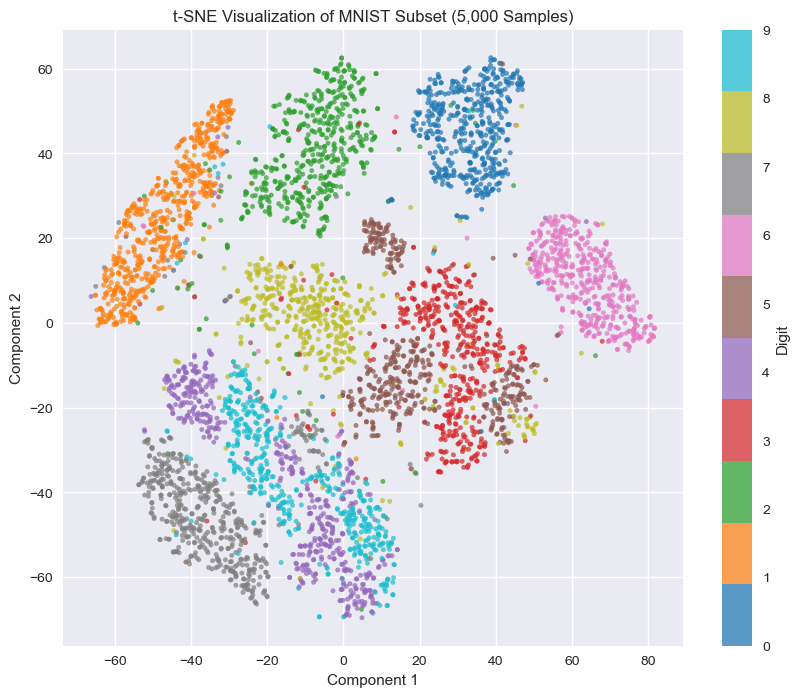

In [86]:
# Plot the result
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample.cat.codes, cmap='tab10', alpha=0.7, s=10)
plt.colorbar(label='Digit', ticks=range(10))
plt.title('t-SNE Visualization of MNIST Subset (5,000 Samples)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [68]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS

# The t-SNE model
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
start_time = time.time()
X_tsne = tsne.fit_transform(X_sample)
end_time = time.time()
time_tsne = end_time - start_time
print(f"t-SNE time: {time_tsne:.2f} seconds")

# Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(
    n_components=2, 
    n_neighbors=30,
    random_state=42
)
start_time = time.time()
X_lle = lle.fit_transform(X_sample)
end_time = time.time()
time_lle = end_time - start_time
print(f"LLE time: {time_lle:.2f} seconds")

# The Multidimensional scaling (MDS)
mds = MDS(
    n_components=2, 
    random_state=42, 
    normalized_stress="auto"
)
start_time = time.time()
X_mds = mds.fit_transform(X_sample)
end_time = time.time()
time_mds = end_time - start_time
print(f"MDS time: {time_mds:.2f} seconds")

t-SNE time: 12.98 seconds
LLE time: 16.08 seconds
MDS time: 1023.00 seconds


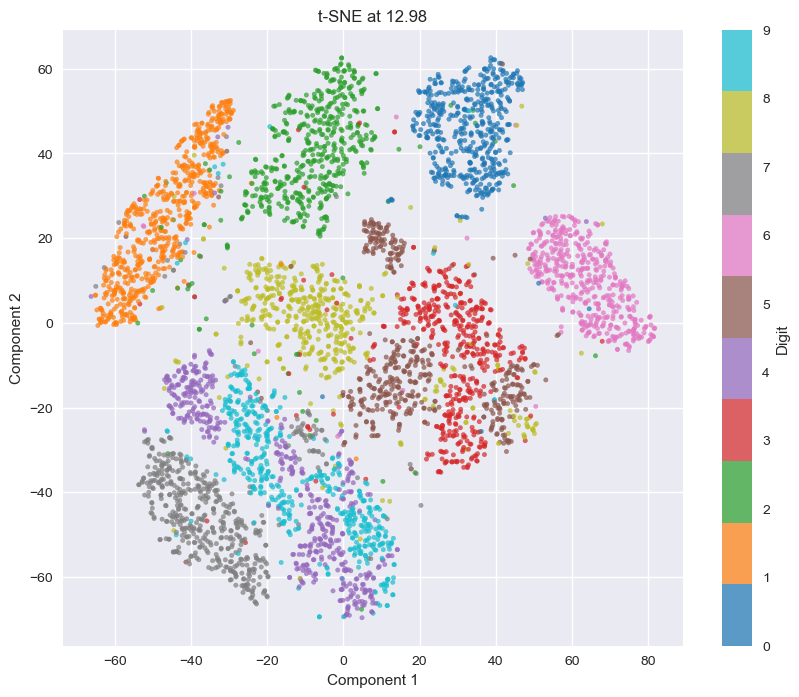

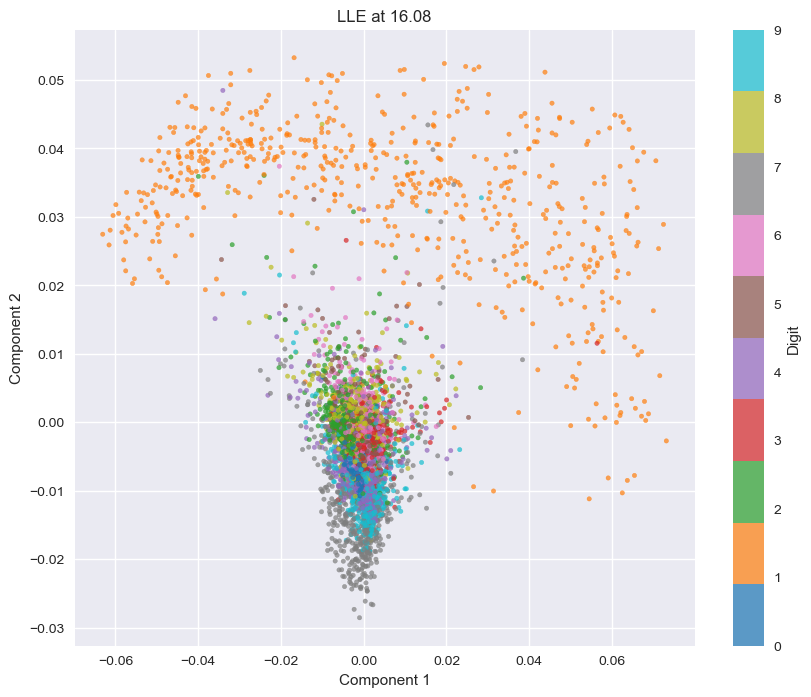

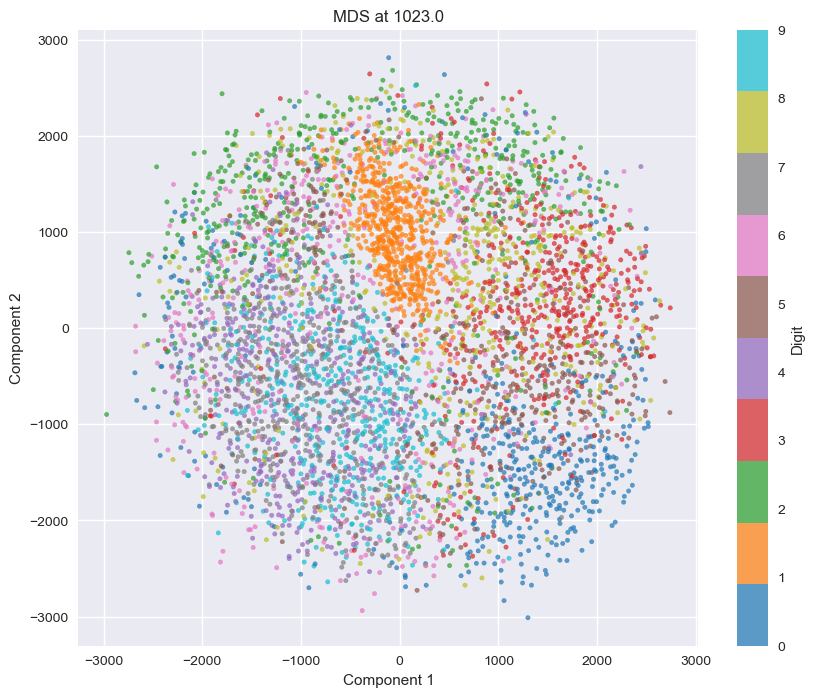

In [84]:
# Now we plot all models
def plot_embedding(X_emb, title, time_r, y=y_sample):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_emb[:, 0], X_emb[:, 1], c=y.astype(int), cmap='tab10', alpha=0.7, s=10)
    plt.colorbar(label='Digit', ticks=range(10))
    plt.title(title+" at "+str(round(time_r, 2)))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

plot_embedding(X_tsne, "t-SNE", time_tsne)
plot_embedding(X_lle, "LLE", time_lle)
plot_embedding(X_mds, "MDS", time_mds)

Clusters are clear and separated in t-SNE, an overlap in LLE, and unclear cluster and poor separation in MDS. The Multidimensional scaling (MDS) took longer time to compute and thus not useful for large datasets.

Visualization:
- t-SNE: Clear clusters for most digits (local structure preserved).

- LLE: Partial clustering, but more overlap (preserves local linear relationships).

- MDS: Poor separation (preserves global distances, struggles with non-linear data).

3. Key Observations
- Criteria	t-SNE	LLE	MDS
- Strengths	Captures non-linear clusters.	Preserves local geometry.	Preserves global structure.
- Weaknesses	Computationally heavy.	Sensitive to noise/parameters.	Extremely slow for large data.
- Use Case	Visualization of local patterns.	Analyzing local neighborhoods.	Global similarity analysis.
- Deterministic?	No (stochastic).	Yes (with fixed random_state).	Yes.
- 4. Recommendations
- t-SNE: Best for visualizing clusters in high-dimensional data (e.g., MNIST).

- LLE: Useful for exploring local linear relationships (tune n_neighbors).

- MDS: Avoid for large datasets; prefer PCA or UMAP for global structure.

5. UMAP as a Modern Alternative
- For faster and often better results than t-SNE:

In [101]:
pip install umap-learn


  Obtaining dependency information for umap-learn from https://files.pythonhosted.org/packages/3c/8f/671c0e1f2572ba625cbcc1faeba9435e00330c3d6962858711445cf1e817/umap_learn-0.5.7-py3-none-any.whl.metadata
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/d2/53/d23a97e0a2c690d40b165d1062e2c4ccc796be458a1ce59f6ba030434663/pynndescent-0.5.13-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
   ---------------------------------------- 88.8/88.8 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB ? eta 0:00:00


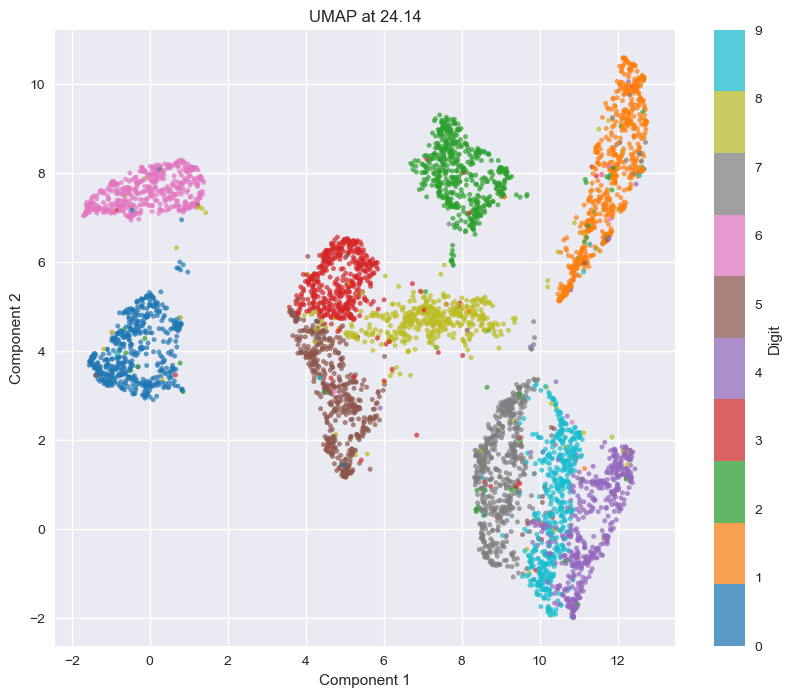

In [105]:
import umap

# Time UMAP
start_time = time.time()
umap_emb = umap.UMAP(random_state=42)
X_umap = umap_emb.fit_transform(X_sample)
umap_time = time.time() - start_time

# Pass runtime to the plotting function
plot_embedding(X_umap, "UMAP", umap_time)